In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'data\sales_data_1.csv')

In [5]:
df.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1


1.**Overall gross margin**

In [6]:
df['Total Revenue'] = df['Selling price'] * df['Quantity sold']
df['Total Cost'] = df['Buying price'] * df['Quantity sold']
gross_margin = df['Total Revenue'].sum() - df['Total Cost'].sum()
print("Overall Gross Margin: {:.2f}".format(gross_margin))


Overall Gross Margin: 31482.75


2. **Most Profitable Vendor**

In [11]:

vendor_profit = df.groupby('Firm bought from')['Total Revenue'].sum() - df.groupby('Firm bought from')['Total Cost'].sum()
most_profitable_vendor = vendor_profit.idxmax()
print("Most Profitable Vendor: ", most_profitable_vendor)

Most Profitable Vendor:  Vendor4


3. **Least Profitable Customer**

In [13]:
customer_profit = df.groupby('Customer')['Total Revenue'].sum() - df.groupby('Customer')['Total Cost'].sum()
least_profitable_customer = customer_profit.idxmin()
print("Least Profitable Customer: ", least_profitable_customer)


The least profitable customer is Customer3


C:\Users\Kala\AppData\Local\Temp\ipykernel_976\965867369.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_sales = df.groupby(["Customer"]).sum()


In [14]:
from datetime import datetime

datewise_sales = df.groupby(["Date"]).sum()
datewise_sales["Profit"] = (datewise_sales["Selling price"] - datewise_sales["Buying price"]) * datewise_sales["Quantity sold"]
most_profitable_day = datewise_sales["Profit"].idxmax()

date = most_profitable_day
print(f"The most profitable date was {date}")

# Convert the most profitable date to a datetime object
most_profitable_day_datetime = datetime.strptime(date, '%d/%m/%y')

most_profitable_day_of_week = most_profitable_day_datetime.strftime('%A')
print(f"The most profitable day of the week was {most_profitable_day_of_week}")

The most profitable date was 21/08/23
The most profitable day of the week was Monday


C:\Users\Kala\AppData\Local\Temp\ipykernel_976\104992336.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datewise_sales = df.groupby(["Date"]).sum()


In [16]:
datewise_sales = df.groupby(["Date"]).sum()
datewise_sales["Profit"] = (datewise_sales["Selling price"] - datewise_sales["Buying price"]) * datewise_sales["Quantity sold"]
most_profitable_day = datewise_sales["Profit"].argmin()

date = datewise_sales.index[most_profitable_day]  # No need to use strftime()
print(f"The least profitable date was {date}")

dt = datetime.strptime(date, "%d/%m/%y")
print(f"The least profitable day of the week was {dt.strftime('%A')}")

The least profitable date was 27/08/23
The least profitable day of the week was Sunday


C:\Users\Kala\AppData\Local\Temp\ipykernel_976\3296559147.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datewise_sales = df.groupby(["Date"]).sum()


6. **3-day average of the daily gross profit for dataset_2**

In [20]:
data = pd.read_csv(r"data\sales_data_2.csv")

In [26]:
data['Total Revenue'] = data['Selling price'] * data['Quantity sold']
data['Total Cost'] = data['Buying price'] * data['Quantity sold']
data['Gross Profit'] = data['Total Revenue'] - data['Total Cost']
data['3-Day Avg Gross Profit'] = data['Gross Profit'].rolling(3).mean()

In [28]:
data.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Gross_Profit,3-Day Rolling Average,Total Revenue,Total Cost,Gross Profit,3-Day Avg Gross Profit
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44,856.68,NaN,4029.52,3172.84,856.68,NaN
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17,146.71,NaN,1423.07,1276.36,146.71,NaN
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15,297.45,433.613333,1556.40,1258.95,297.45,433.613333
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7,87.64,177.266667,451.71,364.07,87.64,177.266667
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1,42.01,142.366667,140.92,98.91,42.01,142.366667


7. **The 3-day mean is varying from 18 to 1673 and there are  clear spikes in the variation on 3 day basis**

In [74]:
data['3-Day Avg Gross Profit']


0            NaN
1            NaN
2     433.613333
3     177.266667
4     142.366667
         ...    
65    552.863333
66    552.070000
67    479.726667
68    386.093333
69    366.720000
Name: 3-Day Avg Gross Profit, Length: 70, dtype: float64

In [29]:
#Minimum value of 3-Day Avg Gross Profit
data['3-Day Avg Gross Profit'].min()


18.25

In [30]:
#Maximum value of 3-Day Avg Gross Profit
data['3-Day Avg Gross Profit'].max()

1673.4699999999996

**8**

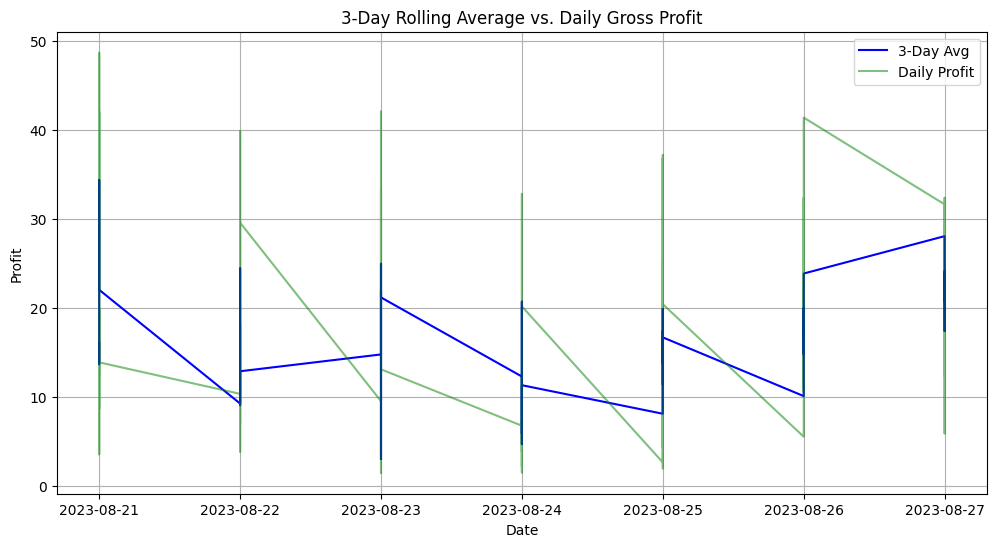

In [33]:
data = data.sort_values(by='Date')

data['Daily Gross Profit'] = data['Selling price'] - data['Buying price']

data['3-Day Rolling Average'] = data['Daily Gross Profit'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['3-Day Rolling Average'], label='3-Day Avg', color='blue')
plt.plot(data['Date'], data['Daily Gross Profit'], label='Daily Profit', color='green', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('3-Day Rolling Average vs. Daily Gross Profit')
plt.legend()
plt.grid(True)

plt.show()

 **8a. The vendor 8  is  having the lowest gross profit**

In [35]:
m=len(data['Firm bought from'].unique())

In [36]:
df['Gross_Profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
vendor_gross_profit = df.groupby('Firm bought from')['Gross_Profit'].sum()
threshold_percentage = 0.10  
# Calculate the vendor threshold
total_gross_profit = df['Gross_Profit'].sum()
vendor_threshold = (total_gross_profit * threshold_percentage)/m
print("Threshold for vendors :",vendor_threshold)
underperforming_vendors = vendor_gross_profit[vendor_gross_profit < vendor_threshold]
print(underperforming_vendors)

Threshold for vendors : 314.8275
Firm bought from
Vendor8    253.74
Name: Gross_Profit, dtype: float64


**8b. After anlayzing the profit of the customers , every customer shown thier unique potenential and hypothetical to let go of any customer**

In [38]:

customer_gross_profit = df.groupby('Customer')['Gross_Profit'].sum().reset_index()
customer_gross_profit['Average_Gross_Profit'] = customer_gross_profit['Gross_Profit'] / df.groupby('Customer')['Gross_Profit'].count().reset_index()['Gross_Profit']
sorted_customers = customer_gross_profit.sort_values(by='Average_Gross_Profit', ascending=False)
print(sorted_customers)

     Customer  Gross_Profit  Average_Gross_Profit
0   Customer1       5310.57            885.095000
1  Customer10       3692.44            738.488000
8   Customer8       6498.91            649.891000
4   Customer4       3337.37            556.228333
2   Customer2       4215.67            421.567000
9   Customer9       1929.08            385.816000
7   Customer7       2197.62            313.945714
6   Customer6       1930.76            275.822857
5   Customer5       1315.28            187.897143
3   Customer3       1055.05            150.721429


***calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices***

In [41]:
buying_price_percentiles = np.percentile(data['Buying price'], [25, 50, 75])

selling_price_percentiles = np.percentile(data['Selling price'], [25, 50, 75])

print("Buying Price Percentiles (25th, Median, 75th):", buying_price_percentiles)
print("Selling Price Percentiles (25th, Median, 75th):", selling_price_percentiles)

Buying Price Percentiles (25th, Median, 75th): [29.9  60.76 78.32]
Selling Price Percentiles (25th, Median, 75th): [ 38.975   78.99   103.3975]


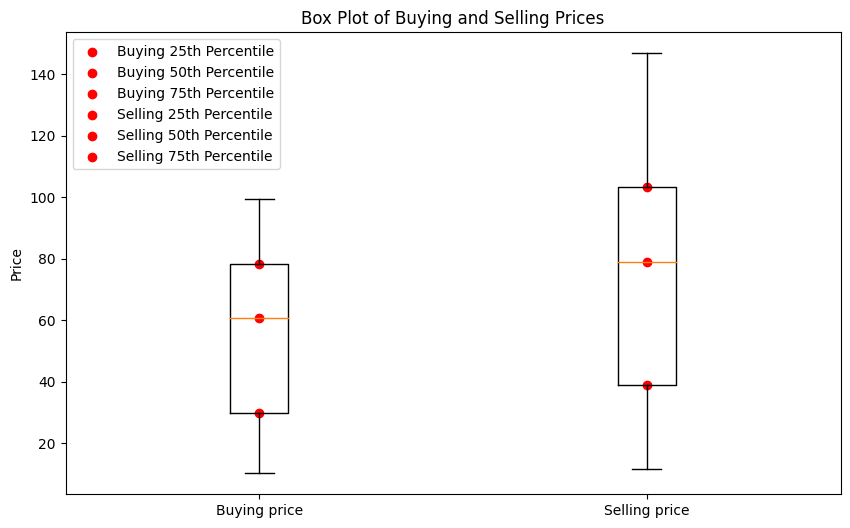

In [42]:
# Create a box plot to visualize percentiles
plt.figure(figsize=(10, 6))
plt.boxplot([df['Buying price'], df['Selling price']], labels=['Buying price','Selling price'])
plt.title('Box Plot of Buying and Selling Prices')
plt.ylabel('Price')

percentiles = [25, 50, 75]
percentile_values = [
    [np.percentile(df['Buying price'], p) for p in percentiles],
    [np.percentile(df['Selling price'], p) for p in percentiles]
]

for i, label in enumerate(['Buying', 'Selling']):
    for j, p in enumerate(percentiles):
        plt.scatter([i + 1], [percentile_values[i][j]], color='red', marker='o', label=f'{label} {p}th Percentile')

plt.legend()

plt.show()

***Sapota’s prices fall below the 25th percentile or above the 75th percentile***

In [43]:
percentile_25 = df['Gross_Profit'].quantile(0.25)
percentile_75 = df['Gross_Profit'].quantile(0.75)

q25 = len(df[df['Gross_Profit'] < percentile_25])
q75 = len(df[df['Gross_Profit'] > percentile_75])


percentage_below_25th = (q25 / len(data)) * 100
percentage_above_75th = (q75 / len(data)) * 100

print(f"Percentage of times Sapota's prices fall below the 25th percentile: {percentage_below_25th:.2f}%")
print(f"Percentage of times Sapota's prices fall above the 75th percentile: {percentage_above_75th:.2f}%")

Percentage of times Sapota's prices fall below the 25th percentile: 25.71%
Percentage of times Sapota's prices fall above the 75th percentile: 25.71%


In [54]:
below_25th_percentile = (data['Buying price'] < buying_price_percentiles[0.25]) | (data['Selling price'] < selling_price_percentiles[0.25])
above_75th_percentile = (data['Buying price'] > buying_price_percentiles[0.75]) | (data['Selling price'] > selling_price_percentiles[0.75])

print("Below 25th percentile frequency:", below_25th_percentile.sum())
print("Above 75th percentile frequency:", above_75th_percentile.sum())

Below 25th percentile frequency: 18
Above 75th percentile frequency: 21


11

**As you can see vendor 4 is having high profit considering other vendors and thats why Bharath is saying to honor vendor 4 and after honoring him the there is a chance in increase of the gross margin and he can be an asset to the business**

In [45]:
vendor_profit

Firm bought from
Vendor1     1555.59
Vendor10    3040.62
Vendor2     1296.98
Vendor3     6370.67
Vendor4     6903.31
Vendor5     1616.14
Vendor6     1217.95
Vendor7     4961.05
Vendor8      253.74
Vendor9     4266.70
dtype: float64

12. **Max gross margin the firm could have in that branch**

In [78]:
# Find the vendor with the highest total profit
strategic_vendor = vendor_profit.idxmax()
max_margin = vendor_profit.max()
print("Vendor with Highest Gross Margin:", strategic_vendor)
print("Max Margin of that Vendor: {:.2f}".format(max_margin))


Vendor with Highest Gross Margin: Vendor4
Max Margin of that Vendor: 6903.31


13. **Increaing and decreasing the price by 1 and analyzing the chnages**

In [92]:
# Price Change Increase
price_change = 1

initial_quantity_sold = data['Quantity sold'].sum()
data['New Selling Price'] = data['Selling price'] + price_change
new_quantity_sold = data['New Selling Price'] * data['Quantity sold']
new_total_quantity_sold = new_quantity_sold.sum()
percentage_change_quantity_sold = ((new_total_quantity_sold - initial_quantity_sold) / initial_quantity_sold) * 100

# Calculate the percentage change in price
percentage_change_price = (price_change / data['Selling price'].mean()) * 100

# Calculate price elasticity
i_elasticity = percentage_change_quantity_sold / percentage_change_price
print("Change in price of Sapota for that Branch icreasing by 1: {:.2f}".format(i_elasticity))


Change in price of Sapota for that Branch icreasing by 1: 5566.55


In [93]:
# Price Change Increase
price_change = 1

initial_quantity_sold = data['Quantity sold'].sum()
data['New Selling Price'] = data['Selling price'] - price_change
new_quantity_sold = data['New Selling Price'] * data['Quantity sold']
new_total_quantity_sold = new_quantity_sold.sum()
percentage_change_quantity_sold = ((new_total_quantity_sold - initial_quantity_sold) / initial_quantity_sold) * 100

# Calculate the percentage change in price
percentage_change_price = (price_change / data['Selling price'].mean()) * 100

# Calculate price elasticity
d_elasticity = percentage_change_quantity_sold / percentage_change_price
print("Change in price of Sapota for that Branch decreasing by 1: {:.2f}".format(d_elasticity))


Change in price of Sapota for that Branch decreasing by 1: 5418.72


In [94]:
Total_change = (i_elasticity - d_elasticity)
print(Total_change)

147.8265714285717


**Change of 147 Rs by increasing 1 Rs and decreasing 1 Rs**